In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

weather = pd.read_csv("./weather/seattleWeather_1948-2017.csv", header = 0, sep = ",")
#We can specify headers manually by adding `names=["DATE", "PRCP", "TMAX", "TMIN", "RAIN"]` to above.
#Since the first line of our data contains the headers, we'll let pandas take care of it automatically with the headers = 0 par

#weather.head()
#weather.tail()

#轉換一下DATE的格式
weather['DATE'] = pd.to_datetime(weather['DATE'])
weather['DATE'] = weather['DATE'].dt.strftime('%Y%m%d')
weather.head()
weather.tail()

weather.describe()
weather.isnull().values.any()
weather.isnull().values
#丟掉NA資料
weather = weather.dropna()
weather.tail()

X = weather.drop(["PRCP", "RAIN"], axis=1) #all columns except PRCP and RAIN, as both give the answer away.
y = weather["PRCP"]

X.head()
y.head()


0    0.47
1    0.59
2    0.42
3    0.31
4    0.17
Name: PRCP, dtype: float64

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)


(20438, 3)
(5110, 3)


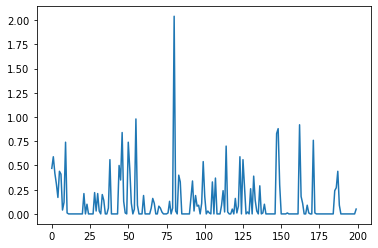

In [5]:
#選一個model
# Linear regression 是個好用的model，當資料是線性的情形
# 但是當資料是像 sin-wave，我們需要其他的model
plt.plot(y[:200])


In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

tree_model = DecisionTreeRegressor()
rf_model = RandomForestRegressor()

tree_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [8]:
y_pred = tree_model.predict(X_test)

MSE:  0.08713970645792563
RMSE:  0.2951943537026507


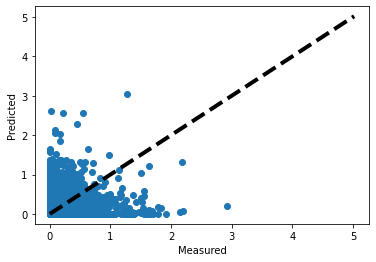

In [9]:
from sklearn import metrics

# MSE
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))

# RMSE
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4) #lw: linewidth
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [10]:
#TODO: 用 RandomForestRegressor 試試看
# TODO Tip:
#k-folder for predict
#ref: https://scikit-learn.org/stable/modules/cross_validation.html


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict


X = weather.drop(["PRCP", "RAIN"], axis=1) #all columns except PRCP and RAIN, as both give the answer away.
y = weather["PRCP"]

rf_model = RandomForestRegressor()

predicted = cross_val_predict(rf_model, X, y, cv=10)

print("MSE: ", metrics.mean_squared_error(y, predicted))

print("RMSE: ", np.sqrt(metrics.mean_squared_error(y, predicted)))

MSE:  0.06587097875143216
RMSE:  0.2566534214683922


In [ ]:
#另一種評分方式

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    print("\n")


from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_model, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

scores = cross_val_score(rf_model, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
rf_rmse_scores = np.sqrt(-scores)


In [ ]:
display_scores(rf_rmse_scores)

In [ ]:
[y.min(), y.max()]

In [ ]:
#provide date in form 19480103
def predictVsActuals(day):
    precipPredictDay = X.loc[X['DATE'] == day]
    precipPredictValue = round(rf_model.predict(precipPredictDay)[0], 3)


    precipActual = weather.loc[weather['DATE'] == day]
    precipActualValue = round(precipActual.iloc[0]["PRCP"], 3)

    print("On", precipActual.iloc[0]["DATE"], "there was a high of", precipActual.iloc[0]["TMAX"], "and a low of", precipActual.iloc[0]["TMIN"])
    print("There were", precipActualValue, "inches of rainfall")
    print("We predicted",precipPredictValue, "inches of rainfall")
    print("we were off by ", round(abs(precipActualValue-precipPredictValue), 3), "inches")
    print("\n")

In [ ]:
weather.head()

In [ ]:
weather.tail()

In [1]:
predictVsActuals('20000101')

NameError: name 'predictVsActuals' is not defined